# Introduction

The dataset utilized is the Family Income and Expenditure Survey 2012 Vol 1. 


This notebook tackles a classification task on the label 'ELECRTIC' on whether or not a family has electricity on their home or not.

# Dataset

The Family Income and Expenditure Survey (FIES) 2012 is a national survey conducted by the Philippine Statistics Authority (PSA) to gather comprehensive data on family income and spending patterns across households in the Philippines. The dataset provides insights into income distribution, expenditure habits, and economic well-being, helping policymakers, researchers, and analysts assess poverty levels, economic growth, and financial behavior among Filipino households.

# Python Libaries and Modules

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Cleaning

The data was preprocessed and cleaned through these methods in order:

**1.) Standardizing Column Names**
- Column names were stripped of whitespace, converted to uppercase, and spaces were replaced with underscores to ensure consistency and avoid potential errors when referencing column names in code.

**2.) Handling Missing Values**
- Columns with more than 50% missing values were dropped.
For numerical columns, missing values were filled with the median of the respective column.
For categorical columns, missing values were filled with the mode (most frequent value).
- Dropping columns with excessive missing values prevents misleading analysis.
Using the median for numerical data avoids the influence of outliers.
- Three specific categorical columns were modified: OCCUP, KB, and CW. If there is no value in OCCUP, there is no value as well in KB and CW. Zero values replaced the N/A ones for all three of them. In CW specifically, since 0 is already used there, all the zeroes were transformed to 7 first before filling up all the N/A values with zeroes.
- Asset ownership features that did not have any input were assumed to have a value of 0 (meaning they do not own that item).

**3.) Removing Duplicates**
- Duplicate rows were removed as they could distort results and introduce bias.

**4.) Converting Data Types**
- Categorical columns (e.g., region, employment status, household type) were converted to category type.
Income and expenditure columns were converted to float.
- Converting numerical columns to float ensures compatibility with mathematical operations whilst categorical columns were converted to category type for easier referencing.

**5.) Handling Outliers**
- The Interquartile Range (IQR) method was used to cap extreme values:
Values below Q1 - 1.5 * IQR were replaced with the lower bound.
Values above Q3 + 1.5 * IQR were replaced with the upper bound.
- Outliers can distort statistical analysis and machine learning models.
The IQR method retains the distribution's general shape while reducing the influence of extreme values.

In [300]:
incexp_df = pd.read_csv("FIES_2012_Cleaned.csv")
import pandas as pd
import numpy as np



# List of numeric columns
numeric_columns = ['W_SHSN', 'NATDC', 'HSE_ALTERTN', 'PSU', 'REGPC', 'T_ACTRENT',
                   'T_BIMPUTED_RENT', 'T_RENTVAL', 'BLDG_TYPE', 'RFACT', 'FSIZE', 'WALLS',
                   'BWEIGHT', 'AGRI_SAL', 'RSTR', 'NONAGRI_SAL', 'T_IMPUTED_RENT', 'AGE',
                   'T_FOOD_NEC', 'MEMBERS', 'NATPC', 'ROOF', 'FOOD_ACCOM_SRVC', 'W_HCN',
                   'POP_ADJ', 'SPOUSE_EMP', 'REGDC', 'HGC']

income_expenditure_columns = [
    "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST", "PENSION", "DIVIDENDS",
    "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR", "NET_RET", "NET_MFG",
    "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES", "T_BREAD", "T_MEAT",
    "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_COFFEE", "T_MINERAL", "T_ALCOHOL", "T_TOBACCO",
    "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH", "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "PCINC"
]

# Combine both lists
all_columns = numeric_columns + income_expenditure_columns

# Outlier handling function using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier handling function to the selected columns
for col in all_columns:
    if col in incexp_df.columns:
        incexp_df = handle_outliers(incexp_df, col)


# Exploratory Data Analysis



Sanity check if there are missing values left in the cleaned dataset file

In [303]:
missing_values = incexp_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
# Get data types of each column
data_types = incexp_df.dtypes

# Display columns with missing values along with their data types
missing_data_info = pd.DataFrame({
    "Missing Values": missing_values[missing_values > 0],
    "Data Type": data_types[missing_values > 0]
})

print("Columns with Missing Values and Their Data Types:\n")
print(missing_data_info)

Missing values per column:
 Series([], dtype: int64)
Columns with Missing Values and Their Data Types:

Empty DataFrame
Columns: [Missing Values, Data Type]
Index: []


## Display Dataset/Table Information
In order to familiarize ourselves with out dataset, we first display the info of our dataset using the `.info()` function. Here we can see the number of rows and columns and the variable type of each feature.

In [305]:
# prints the info on the dataset
incexp_df.info()

# prints the rows and columns of the dataset
print("\nRows and columns of the Dataset:")
print(incexp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(102), int64(17)
memory usage: 36.5 MB

Rows and columns of the Dataset:
(40171, 119)


## Using `.head()` and `.tail()` function
We use the head and tail function to see what are the first values and the last value of the dataset. This is to give an idea on what kind of values we are working with.

In [307]:
incexp_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2.0,25.0,2,21100.0,415052.0,138.25,200.6576,3.0,...,1.0,1.0,0.0,0.0,0.946172,11.593749,9.0,8.0,8.0,9.0
1,14,101001000,3.0,43.0,2,21100.0,415052.0,138.25,200.6576,10.5,...,0.0,1.0,0.0,1.0,0.946172,10.329820,5.0,9.0,9.0,4.0
2,14,101001000,4.0,62.0,2,21100.0,415052.0,138.25,200.6576,2.0,...,0.0,1.0,0.0,0.0,0.946172,11.373589,9.0,6.0,6.0,8.0
3,14,101001000,5.0,79.0,2,21100.0,415052.0,138.25,200.6576,4.0,...,0.0,1.0,0.0,0.0,0.946172,10.676526,6.0,6.0,6.0,6.0
4,14,101001000,10.0,165.0,2,21100.0,415052.0,138.25,200.6576,5.0,...,0.0,0.0,0.0,1.0,0.946172,10.531637,6.0,6.0,6.0,5.0


In [308]:
incexp_df.tail()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
40166,12,9804029001,18.0,568.0,1,22000.0,114062.0,271.25,963.2264,5.0,...,0.0,0.0,0.0,0.0,0.902863,10.312367,5.0,5.0,7.0,7.0
40167,12,9804035000,1.0,25.0,2,22000.0,414067.0,271.25,588.6253,9.0,...,0.0,1.0,0.0,0.0,0.902863,9.572890,1.0,5.0,7.0,3.0
40168,12,9804035000,2.0,51.0,2,22000.0,414067.0,271.25,588.6253,6.0,...,0.0,0.0,0.0,0.0,0.902863,9.859448,3.0,4.0,6.0,4.0
40169,12,9804035000,3.0,75.0,2,22000.0,414067.0,271.25,588.6253,5.0,...,0.0,1.0,0.0,0.0,0.902863,10.341291,5.0,6.0,7.0,7.0
40170,12,9804035000,4.0,102.0,2,22000.0,414067.0,271.25,588.6253,7.0,...,0.0,0.0,0.0,0.0,0.902863,9.663897,2.0,4.0,6.0,3.0


In [309]:
print(incexp_df.dtypes)

W_REGN      int64
W_OID       int64
W_SHSN    float64
W_HCN     float64
URB         int64
           ...   
PCINC     float64
NATPC     float64
NATDC     float64
REGDC     float64
REGPC     float64
Length: 119, dtype: object


## Label Variable Distribution (Electric)

The distribution of the ELECTRIC column is heavily skewed towards those who already have electricity. Due to this, remodelling is needed in order for the machine learning models to work properly. 

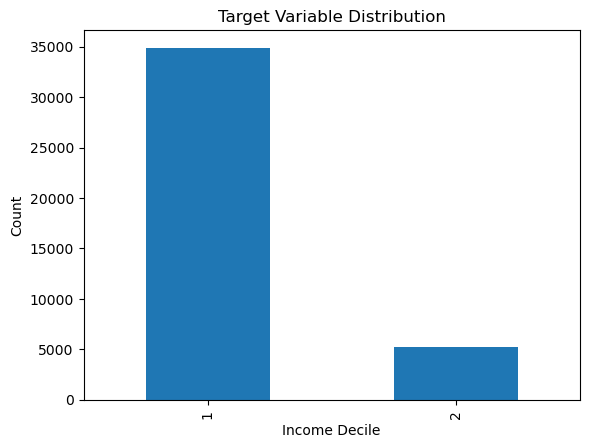

In [312]:
incexp_df['ELECTRIC'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Income Decile')
plt.ylabel('Count')
plt.show()

The two categories (1 and 2) of ELECTRIC need to be equalized by either creating synthetic data for the lacking category (2) or by deleting rows from the ample category (1). The majority class was undersampled so that we can still use realworld data for training and to prevent overfitting from too many rows of features.

In [314]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Define categorical columns to exclude from standardization
categorical_columns = [
    # Text-based categorical
    "W_REGN", "URB", "SEX", "MS", 'W_OID', "JOB", "HHTYPE", "TENURE", "TOILET", "ELECTRIC", "WATER",
    # Numeric categorical 
    "OCCUP", "KB", "CW", "AGELESS5", "AGE5_17", "EMPLOYED_PAY", "EMPLOYED_PROF"
]

# Checking class distribution before balancing
print("Class distribution before balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Splitting features and target variable
X = incexp_df.drop('ELECTRIC', axis=1)  # Drop the target column
y = incexp_df['ELECTRIC']               # Target column

# Separate categorical and numerical columns
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Standardize only numerical columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Combine scaled features and target back into a single DataFrame
balanced_df = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = balanced_df[balanced_df['ELECTRIC'] == 1]
minority_class = balanced_df[balanced_df['ELECTRIC'] == 2]

### OPTION 1: Undersample Majority Class ###
majority_undersampled = majority_class.sample(len(minority_class), random_state=42)
balanced_df = pd.concat([majority_undersampled, minority_class])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Update incexp_df with the balanced data
incexp_df = balanced_df

# Checking the new class distribution after balancing
print("\nClass distribution after balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Displaying a few rows of the updated DataFrame
print("\nSample of the balanced dataset:")
print(incexp_df.head())


Class distribution before balancing:
ELECTRIC
1    34886
2     5285
Name: count, dtype: int64

Class distribution after balancing:
ELECTRIC
1    5285
2    5285
Name: count, dtype: int64

Sample of the balanced dataset:
   W_REGN       W_OID    W_SHSN     W_HCN  URB      RSTR       PSU   BWEIGHT  \
0      13  7501120004  1.189398  1.922436    1  1.463552 -0.386650  0.871048   
1       2  1513033002  0.543651 -0.548448    2  1.012240 -1.398083 -1.137228   
2      11  2401016000 -0.102096 -0.419345    2 -0.441989 -0.403210 -0.409227   
3      12  4701001002  1.189398 -0.236450    1  0.510782  0.493164 -0.671391   
4       1  5503031001 -1.393590 -0.993135    2  0.611073 -0.513133  0.090228   

      RFACT     FSIZE  ...  OVEN_QTY  MOTOR_BANCA_QTY  MOTORCYCLE_QTY  \
0  0.235254  0.621521  ... -0.392104        -0.092333       -0.429018   
1 -1.143164 -1.730982  ... -0.392104        -0.092333       -0.429018   
2 -0.622976  0.386270  ... -0.392104        -0.092333       -0.429018   
3 -0.555

## Feature Importance


import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = incexp_df.drop(columns=['ELECTRIC'])  
y = incexp_df['ELECTRIC']

rf = RandomForestClassifier()
selector = RFE(rf, n_features_to_select=20, step=10)  # step=10 removes 10 features per iteration
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['W_OID', 'RFACT', 'NET_RECEIPT', 'REGFT', 'T_MEAT', 'T_MILK', 'T_VEG',
       'T_SUGAR', 'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION', 'T_NFOOD',
       'T_TOTEX', 'TOILET', 'WATER', 'DISTANCE', 'TV_QTY', 'CD_QTY',
       'CELLPHONE_QTY', 'PCINC'],
      dtype='object')

## Feature Analysis

## Investigating Correlation between Features
In this section, we will investigate which features have a high correlation with each other. This is to determine which features should be used or removed depending on the data analysis we want to apply.

Here we test the correlation of the features `WAGES`, `AGRI_SAL`, `CASH_ABROAD`.

In [321]:
correlations = {}
for feature in selected_features:
    correlations[feature] = incexp_df[[feature, 'ELECTRIC']].corr().iloc[0, 1]

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation_with_ELECTRIC'])

# Sort the correlations in descending order
correlation_df = correlation_df.sort_values(by='Correlation_with_ELECTRIC', ascending=False)

# Print the correlation with ELECTRIC
print(correlation_df)

            Feature  Correlation_with_ELECTRIC
0             WATER                   0.457738
1       NET_RECEIPT                   0.403798
2            TOILET                   0.339757
14         DISTANCE                   0.254283
12            W_OID                   0.075601
13              AGE                  -0.069055
16          T_SUGAR                  -0.138288
17            RFACT                  -0.250159
11          REF_QTY                  -0.492465
15           T_MEAT                  -0.510784
10  T_MISCELLANEOUS                  -0.517994
8             PCINC                  -0.521591
7             TOINC                  -0.530255
9   T_COMMUNICATION                  -0.530665
5            CD_QTY                  -0.576132
6           T_NFOOD                  -0.597985
4   T_HOUSING_WATER                  -0.615529
3            TV_QTY                  -0.718934


Nothing changed.

In [323]:
# List of features to include in the correlation test
features = ['W_OID', 'RFACT', 'NET_RECEIPT', 'TOINC', 'T_MEAT', 'T_SUGAR',
            'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION', 'T_MISCELLANEOUS',
            'T_NFOOD', 'T_TOTEX', 'T_TOTDIS', 'T_TOREC', 'TOILET', 'WATER',
            'TV_QTY', 'CD_QTY', 'REF_QTY', 'PCINC']

# Selecting the features and computing the correlation matrix
correlation_test = incexp_df[features].corr()

# Display the correlation matrix
print(correlation_test)

                    W_OID     RFACT  NET_RECEIPT     TOINC    T_MEAT  \
W_OID            1.000000 -0.011728    -0.090742  0.013880 -0.084606   
RFACT           -0.011728  1.000000    -0.393852  0.202152  0.255113   
NET_RECEIPT     -0.090742 -0.393852     1.000000 -0.407995 -0.338289   
TOINC            0.013880  0.202152    -0.407995  1.000000  0.713962   
T_MEAT          -0.084606  0.255113    -0.338289  0.713962  1.000000   
T_SUGAR          0.027150 -0.006250    -0.045998  0.491408  0.381768   
T_HOUSING_WATER -0.002041  0.291659    -0.533577  0.820441  0.650223   
T_RENTVAL        0.021844  0.298307    -0.552028  0.714132  0.542203   
T_COMMUNICATION -0.011035  0.209018    -0.382546  0.709323  0.585511   
T_MISCELLANEOUS  0.006363  0.206952    -0.398729  0.823396  0.672110   
T_NFOOD         -0.001073  0.263148    -0.477323  0.912472  0.709165   
T_TOTEX          0.017100  0.233563    -0.428483  0.939491  0.743122   
T_TOTDIS         0.012653  0.225660    -0.420707  0.948775  0.73

T_TOREC, T_TOTDIS, and T_TOTEX are highly related to TOINC and due to that, they are dropped.

In [325]:
#Remaining Features
selected_features = ['WATER', 'NET_RECEIPT', 'TOILET', 'TV_QTY', 'T_HOUSING_WATER', 
            'CD_QTY', 'T_NFOOD', 'TOINC', 'PCINC', 'T_COMMUNICATION', 
            'T_MISCELLANEOUS', 'REF_QTY', 'W_OID', 'AGE', 'DISTANCE', 'T_MEAT', 'T_SUGAR', 'RFACT']


# Initial Model Training

## Logistic Regression

Seeing as this is a binary classification problem wherein the target variable is categorical, logistic regression is well suited for it. It is also easier to interpret with logistic regression as it provides probabilities for each class, which helps in understanding the confidence of predictions. Lastly, logistic regression is recommended as there is a linear relationship between the independent variables and the log-odds of the dependent variable.



## Naive Bayes

## K-Nearest Neighbors Classifier

## All Models and their Outputs

In [332]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = incexp_df[selected_features]  # Using the selected features from RFE
y = incexp_df['ELECTRIC']

# Dictionary to store model names and their instances
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance')
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use iloc[] for row selection
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        #cm = confusion_matrix(y_test, y_pred)
        # plt.figure(figsize=(6, 5))
        #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        #plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        #plt.xlabel('Predicted')
        #plt.ylabel('Actual')
        #plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    variance = np.var(accuracies) * 100  # Variance of accuracies
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")
    print(f"Variance of Accuracy for {model_name}: {variance:.4f}%")



Model: Logistic Regression
Fold 1 Accuracy: 49.48%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1068
           2       0.49      1.00      0.66      1046

    accuracy                           0.49      2114
   macro avg       0.75      0.50      0.33      2114
weighted avg       0.75      0.49      0.33      2114

Fold 2 Accuracy: 49.57%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1066
           2       0.50      1.00      0.66      1048

    accuracy                           0.50      2114
   macro avg       0.75      0.50      0.33      2114
weighted avg       0.75      0.50      0.33      2114

Fold 3 Accuracy: 51.42%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       1.00

# Error Analysis

## Logistic Regression

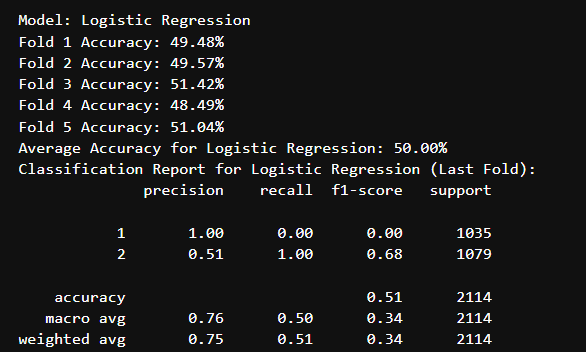

We can see that the precision of class 1 is 100% indicating that everything there is correctly classified true positives however this is not valid with it's recall being 0.00 meaning class 1 was never predicted in the first place. As for class 2, it has predicted true positives 51% of the time but the issue is that every instance has predicted it being class 2 and with there being 2 instances and an equalized model (50/50 distribution of both classes), that may be the reason why it has an average accuracy of 50%. The main challenge now is to make the model predict both of the two and not just one of them.

## Naive Bayes

In the reports, it seems to show that the Gaussian Naive Bayes model has the tendency to misclassify class 1 a little more compared to class 2, based on the precision of both classes and their recall, which class 1 has a precision of between 50-60%, but the recall is baring a result of less than 50%. While the predictions for class 2 is alot more accurate, having precision scores between 53-56%, and the recall being higher than 60%. This is showin that the model is predicting class 2 more compared to class 1.

## KNN Classifier

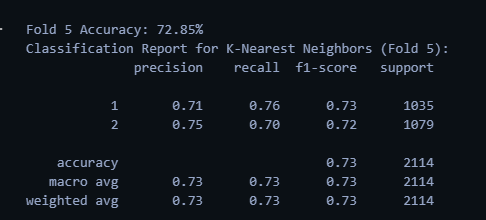

Here, we can see the last KNN fold results in an accuracy of 72.85%, a reasonable accuracy but not really a high performing one. This could still be improved.

Additionally we can see that precision, recall, and f-score of class 1 and 2 are balanced, having a line of 0.7, and the dataset is almost balanced with 1035 vs. 1079 instances.

Since class 1 has higher recall than precision, it catches most of the true positives of the category but also has some false positives. Vice versa, class 2 has a higher precision than recall, meaning that it is better at avoiding false positives but misses some true positives in its own class. We now try to improve the model performance of KNN.

# Improving Model Performance

## Logistic Regression

The Optuna library was utilized to determine the optimal hyperparameters for the highest accuracy. Optuna uses a Bayesian optimization approach that optimizes itself based on past results. 

In Optuna the tuning process goes from: 
- Defining the Objective Function
- Creating a Study
- Running the Optimization
- Extracting the Best Hyperparameters

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the objective function
def objective(trial):
    # Suggest hyperparameters to optimize
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
    C = trial.suggest_loguniform("C", 1e-4, 1e2)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    l1_ratio = trial.suggest_uniform("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None
    
    # Logistic Regression model with suggested hyperparameters
    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        l1_ratio=l1_ratio if penalty == "elasticnet" else None,
        max_iter=1000
    )

    # K-Fold Cross-Validation (K=5)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        except Exception as e:
            return 0.0  # Return zero if training fails
    
    # Return the average accuracy over all folds
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy


import optuna
from sklearn.linear_model import LogisticRegression

# Create a study and optimize the objective function
study = optuna.create_study(direction="maximize")

def objective(trial):
    # Suggest solver and penalty independently
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])

    # Check for incompatible combinations and skip trial if invalid
    if solver == "liblinear" and penalty not in ["l1", "l2"]:
        raise optuna.TrialPruned()

    if solver == "saga" and penalty == "none":
        raise optuna.TrialPruned()

    # Use suggest_float with log=True for C
    C = trial.suggest_float("C", 1e-4, 1e2, log=True)

    # Use suggest_float instead of suggest_uniform for l1_ratio if using elasticnet
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None

    # Handle the 'none' penalty correctly
    penalty = None if penalty == "none" else penalty

    # Create and train the model
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    return accuracy

study.optimize(objective, n_trials=50)

# Print the best hyperparameters and score
print(f"\nBest trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_trial.value * 100:.2f}%")


From running the optimization, the accuracy is now ~ 90 %

In [348]:
best_params = {
    'solver': 'liblinear',
    'penalty': 'l1',
    'C': 2.1575802199275707
}


# Train the optimized Logistic Regression model
improved_log_model = LogisticRegression(
    solver=best_params['solver'],
    penalty=best_params['penalty'],
    C=best_params['C'],
    max_iter=1000  # Increase if convergence issues arise
)

The common hyperparameters that highly affect the Logistic Regression model is the solver being liblinear and the penalty being l1. The C value affects it as well although to a not so significant extent.

The solver being liblinear helped a ton due to it being designed for binary classification which is what the data is using (either with or without electricity). On the other hand, the l1 penalty introduces L1 regularization, which has the effect of shrinking less important feature coefficients to exactly zero.

## Naive Bayes


GridSearchCV was used to tune the Naive Bayes model



In [352]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [353]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [354]:
grid_model = GridSearchCV(estimator=GaussianNB(), param_grid = params_nb, verbose = 1, cv = 10, n_jobs=1)

In [355]:
accuracies = []

for train_index, test_index in kf.split(X):
   
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
  
    grid_model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f"Average Accuracy: {np.mean(accuracies) * 100:.2f}%")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Average Accuracy: 82.89%


## KNN Classifier

KNN has different ways of improving the model. Most commonly is the hyperparameter tuning. We decided to tune both the hyperparameter k and the type of distance to be used by the model.

### Cross-validation for getting the Hyperparameter K

Since KNN highly relies on the hyperparamter K, we use the cross-validation to determine the best value for hyperparameter k.

We use the sklearn.model_selection.cross_val_score() to do this.

In [360]:
from sklearn.model_selection import cross_val_score

We add an array of possible values for the hyperparameter k. We'll add 10 arbitrary values.


In [362]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 45, 100]

Additionally, we instantiate an empty array to put the scores of each hyperparameter k has.

In [364]:
k_scores = np.zeros((len(k_choices), 5))

We combine the X_train, X_test, y_train, and y_test values to be used.

In [366]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    model = KNeighborsClassifier(k_choices[i])
    k_scores[i] = cross_val_score(model, X, y, cv=5)
    print(k_scores[i])
    pass

k is : 1
[0.70813623 0.71381268 0.71712394 0.70529801 0.71996216]
k is : 3
[0.74172185 0.71996216 0.7256386  0.73651845 0.72090823]
k is : 5
[0.73368023 0.72090823 0.73178808 0.72847682 0.71570482]
k is : 8
[0.72705771 0.71192053 0.73178808 0.72469253 0.71381268]
k is : 10
[0.72232734 0.71759697 0.72469253 0.71333964 0.7076632 ]
k is : 12
[0.71617786 0.71097446 0.71617786 0.71333964 0.70435194]
k is : 15
[0.72232734 0.71854305 0.72090823 0.7128666  0.70435194]
k is : 20
[0.72232734 0.70813623 0.71192053 0.7128666  0.70340587]
k is : 45
[0.70529801 0.69394513 0.70245979 0.69631031 0.67928098]
k is : 100
[0.68448439 0.67360454 0.66272469 0.68211921 0.67549669]


In order to understand it better, we plot it using the matplotlib.pyplot and importing it as plt

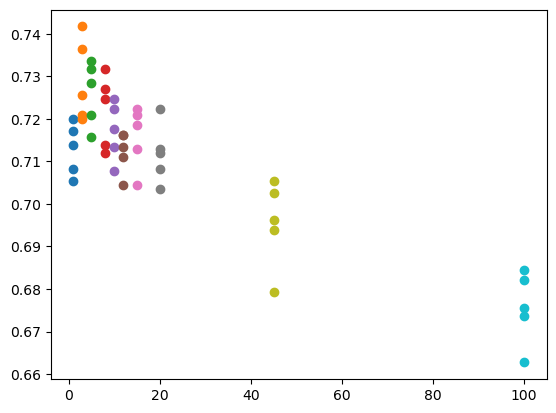

In [368]:
import matplotlib.pyplot as plt

def scatter_plot(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])

scatter_plot(k_scores)

In order to visualize it more properly, we calculate the mean and standard deviation of each scores from the folds of each hyperparameter k.

We use np.mean to get the average score per KNN model and np.std for getting the standard deviation.

In [370]:
avg_k_scores = np.mean(k_scores, axis=1)
print("Average of k_scores: ", avg_k_scores)

std_k_scores = np.std(k_scores, axis=1)
print("\nStandard Deviation of k_scores: ", std_k_scores)

Average of k_scores:  [0.7128666  0.72894986 0.72611164 0.7218543  0.71712394 0.71220435
 0.71579943 0.71173132 0.69545885 0.6756859 ]

Standard Deviation of k_scores:  [0.00545943 0.00868123 0.00678936 0.0077092  0.00613855 0.00438268
 0.00657096 0.00625841 0.00906159 0.00763101]


We now visualize this in a graph.

Text(0, 0.5, 'Cross-validation accuracy')

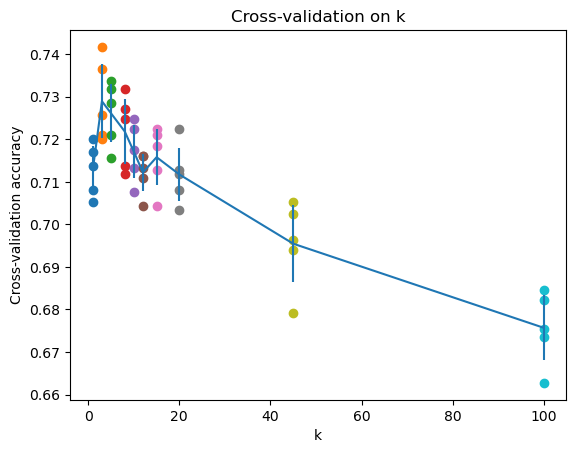

In [372]:
scatter_plot(k_scores)

plt.errorbar(k_choices, avg_k_scores, yerr=std_k_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Here we can see that the accuracy peaks at the area with the orange dots. Basing this from the k_choices array, the hyperparamter k = 3 represents the orange dots, which means that setting the hyperparameter k to 3 results in a higher accuracy than the rest.

We now use 3 as our hyperparameter k in modeling our new KNN classifier.

In [374]:
knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We first test it on the training data to determine the training accuracy.

In [376]:
y_predicted = knn_classifier.predict(X_train)
def compute_accuracy(predictions, actual):
    num_correct = (predictions == actual).sum()
    accuracy = num_correct / predictions.shape[0] * 100
    return accuracy
print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  83.20719016083254

Classification report:
                precision    recall  f1-score   support

           1       0.83      0.83      0.83      4250
           2       0.83      0.83      0.83      4206

    accuracy                           0.83      8456
   macro avg       0.83      0.83      0.83      8456
weighted avg       0.83      0.83      0.83      8456



We now test it on the testing data.

In [378]:
y_predicted = knn_classifier.predict(X_test)

print("Testing accuracy: ",  compute_accuracy(y_test, y_predicted))
print("\nClassification_report:\n", classification_report(y_test, y_predicted))

Testing accuracy:  72.18543046357617

Classification_report:
               precision    recall  f1-score   support

           1       0.72      0.72      0.72      1035
           2       0.73      0.73      0.73      1079

    accuracy                           0.72      2114
   macro avg       0.72      0.72      0.72      2114
weighted avg       0.72      0.72      0.72      2114



From the results, there wasn't that much of an improvement to the model by simply adjusting the hyperparameter k.

Now, why not we adjust the measuring distance used by the model with the same value for hyperparameter k.

## Testing other Distance Metrics

Since KNN classifier uses Euclidean distance as the default, we will explore other distance metrics such as Manhattan, Minkowski, and Cosine distance to see whether we can improve our KNN model more.

### Manhattan Distance

The Euclidean distance is ignored and instead is based on the absolute differences of their Cartesian coordinates.

In [384]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3, metric= 'manhattan')

In [385]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Test it on the training data first.

Next, testing it on the test data.

Here we can see that the accuracy for both training and testing has slightly improved by 3% (based on the testing accuracy) when using Manhattan distance.

### Minkowski Distance

Can be considered the generalization of Euclidean and Manhattan Distance.

In [391]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3, metric= 'minkowski')

In [392]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We first test it on the training dataset.

In [394]:
y_predicted = knn_classifier.predict(X_train)

print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  83.20719016083254

Classification report:
                precision    recall  f1-score   support

           1       0.83      0.83      0.83      4250
           2       0.83      0.83      0.83      4206

    accuracy                           0.83      8456
   macro avg       0.83      0.83      0.83      8456
weighted avg       0.83      0.83      0.83      8456



Next, the test dataset.

y_predicted = knn_classifier.predict(X_test)

print("Testing accuracy: ", compute_accuracy(y_test, y_predicted))
print("\nClassification report:\n ", classification_report(y_test, y_predicted))

Here, we can see using Minkowski distance does not improve the accuracy for both the training and testing. We now move on to the last one.

Cosine Distance

This measures the difference of two vectors by getting their cosine of the angle between them.

In [400]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric= 'cosine')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

In [401]:
y_predicted = knn_classifier.predict(X_train)

print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  50.30747398297068

Classification report:
                precision    recall  f1-score   support

           1       0.71      0.02      0.04      4250
           2       0.50      0.99      0.67      4206

    accuracy                           0.50      8456
   macro avg       0.60      0.51      0.35      8456
weighted avg       0.60      0.50      0.35      8456



Just from the training accuracy, we can already tell that Cosine distance does not improve our model, instead it worsens the model.

### Final Hyperparameters

From the cross-validation and testing on different metrics, we conclude that the hyperparameter k = 3 using the Manhattan distance provides an increase in the original KNN model. While it may not be big, this proves that further tuning of hyperparameters helps improve the model.

We will now finalize the knn_classifier variable with the said hyperparameters.

In [406]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# Model Performance Summary


Model: Logistic Regression
Fold 1 Accuracy: 90.07%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       0.94      0.85      0.90      1049
           2       0.87      0.95      0.91      1065

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



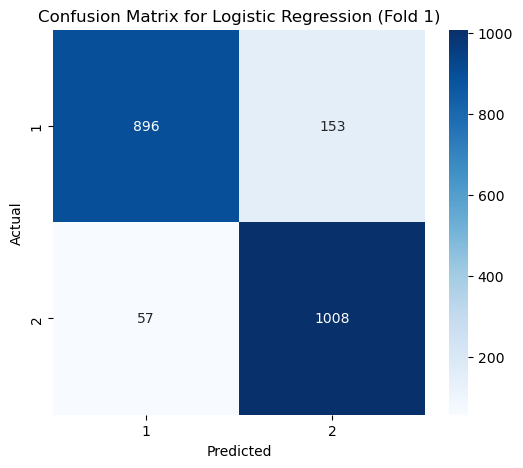

Fold 2 Accuracy: 91.44%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      1042
           2       0.88      0.97      0.92      1072

    accuracy                           0.91      2114
   macro avg       0.92      0.91      0.91      2114
weighted avg       0.92      0.91      0.91      2114



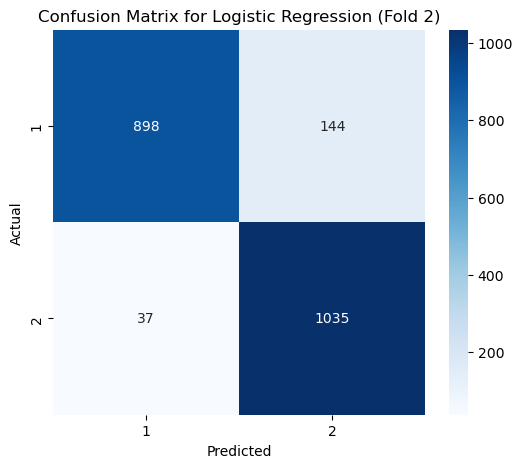

Fold 3 Accuracy: 90.87%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1056
           2       0.88      0.95      0.91      1058

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



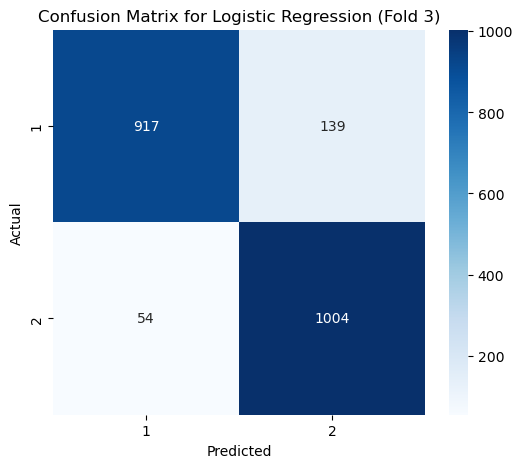

Fold 4 Accuracy: 90.68%
Classification Report for Logistic Regression (Fold 4):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1057
           2       0.88      0.94      0.91      1057

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



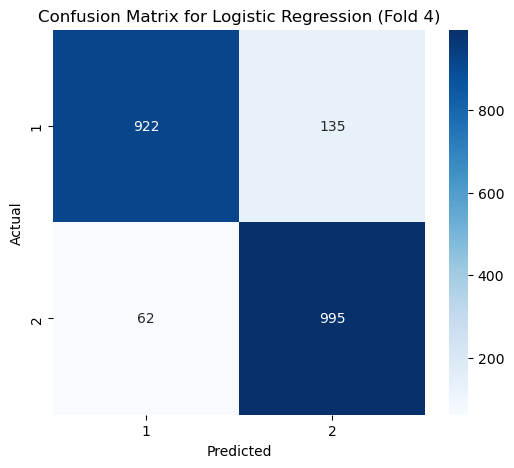

Fold 5 Accuracy: 89.69%
Classification Report for Logistic Regression (Fold 5):
              precision    recall  f1-score   support

           1       0.95      0.84      0.89      1081
           2       0.85      0.95      0.90      1033

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



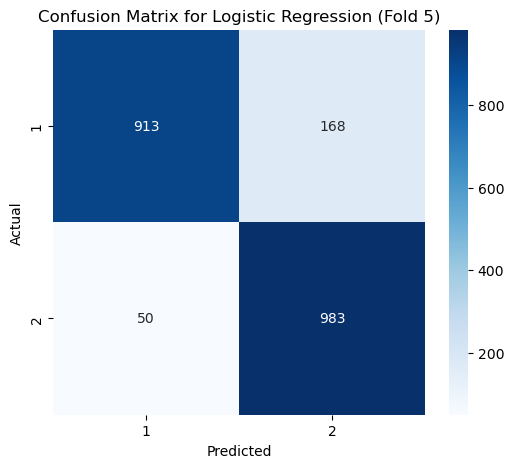

Average Accuracy for Logistic Regression: 90.55%

Model: Naive Bayes
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 1 Accuracy: 56.43%
Classification Report for Naive Bayes (Fold 1):
              precision    recall  f1-score   support

           1       0.57      0.48      0.52      1049
           2       0.56      0.64      0.60      1065

    accuracy                           0.56      2114
   macro avg       0.57      0.56      0.56      2114
weighted avg       0.57      0.56      0.56      2114



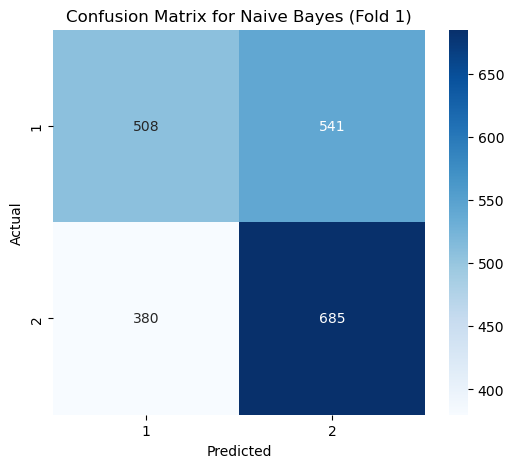

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 2 Accuracy: 54.64%
Classification Report for Naive Bayes (Fold 2):
              precision    recall  f1-score   support

           1       0.55      0.45      0.50      1042
           2       0.55      0.64      0.59      1072

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.55      0.55      0.54      2114



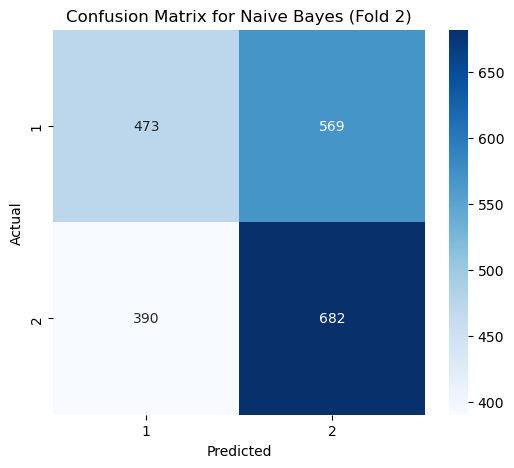

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 3 Accuracy: 57.05%
Classification Report for Naive Bayes (Fold 3):
              precision    recall  f1-score   support

           1       0.59      0.45      0.51      1056
           2       0.56      0.69      0.62      1058

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



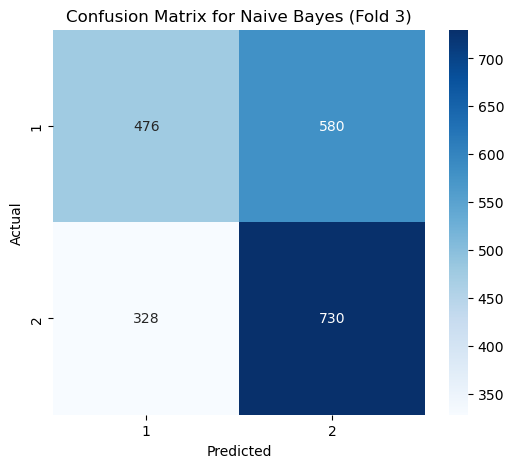

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 4 Accuracy: 56.72%
Classification Report for Naive Bayes (Fold 4):
              precision    recall  f1-score   support

           1       0.59      0.46      0.52      1057
           2       0.56      0.67      0.61      1057

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



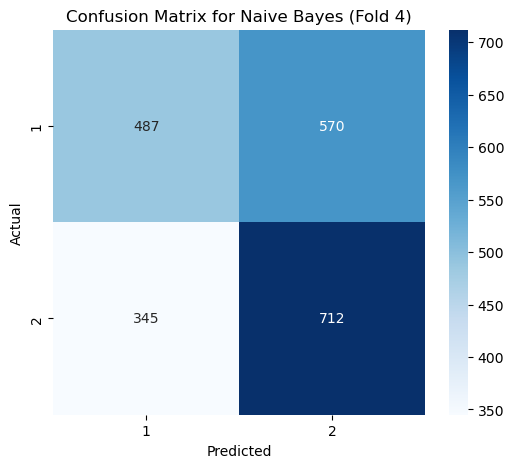

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 5 Accuracy: 54.68%
Classification Report for Naive Bayes (Fold 5):
              precision    recall  f1-score   support

           1       0.58      0.40      0.48      1081
           2       0.53      0.70      0.60      1033

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.56      0.55      0.54      2114



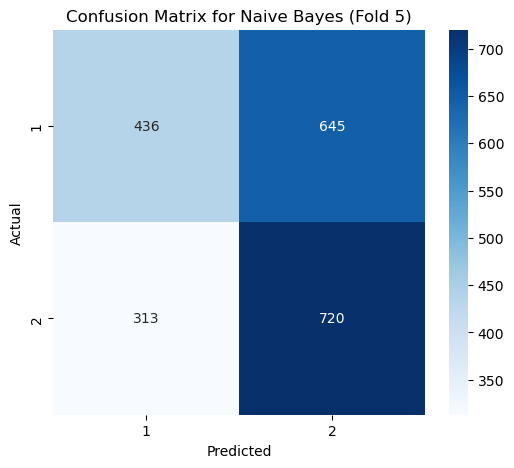

Average Accuracy for Naive Bayes: 55.90%

Model: K-Nearest Neighbors
Fold 1 Accuracy: 76.54%
Classification Report for K-Nearest Neighbors (Fold 1):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1049
           2       0.76      0.78      0.77      1065

    accuracy                           0.77      2114
   macro avg       0.77      0.77      0.77      2114
weighted avg       0.77      0.77      0.77      2114



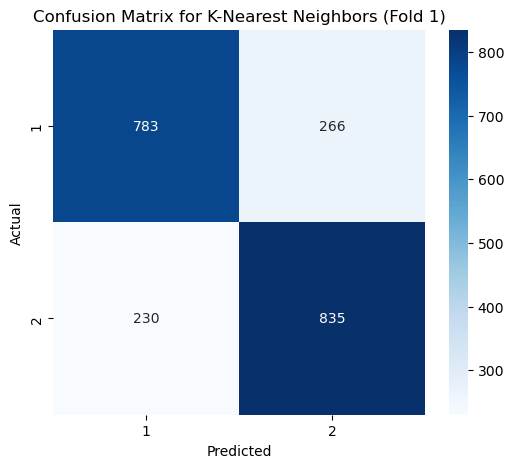

Fold 2 Accuracy: 76.25%
Classification Report for K-Nearest Neighbors (Fold 2):
              precision    recall  f1-score   support

           1       0.76      0.75      0.76      1042
           2       0.76      0.77      0.77      1072

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



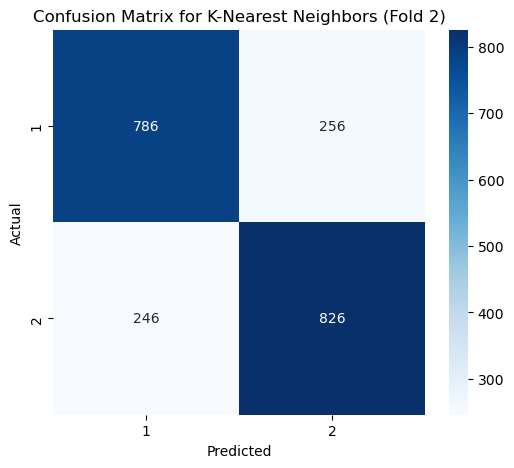

Fold 3 Accuracy: 76.11%
Classification Report for K-Nearest Neighbors (Fold 3):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1056
           2       0.75      0.78      0.76      1058

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



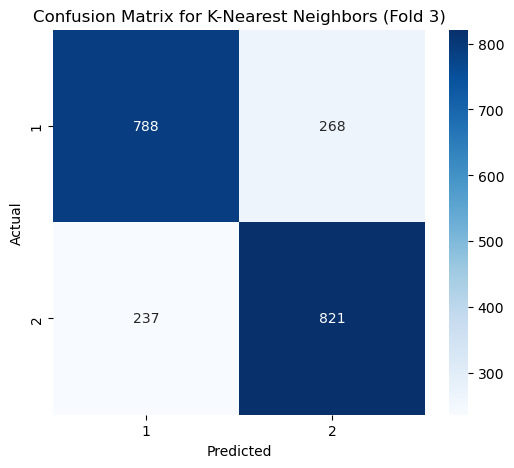

Fold 4 Accuracy: 75.35%
Classification Report for K-Nearest Neighbors (Fold 4):
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      1057
           2       0.76      0.74      0.75      1057

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



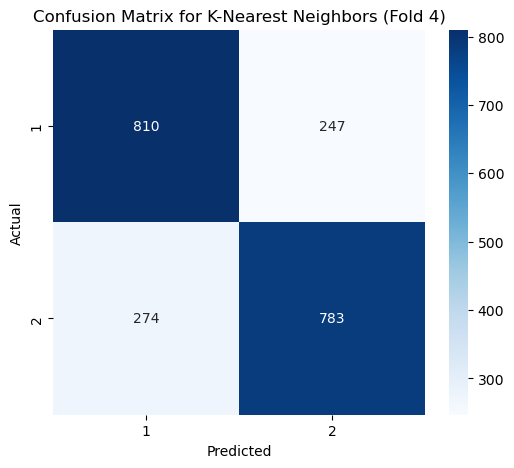

Fold 5 Accuracy: 74.93%
Classification Report for K-Nearest Neighbors (Fold 5):
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      1081
           2       0.73      0.77      0.75      1033

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



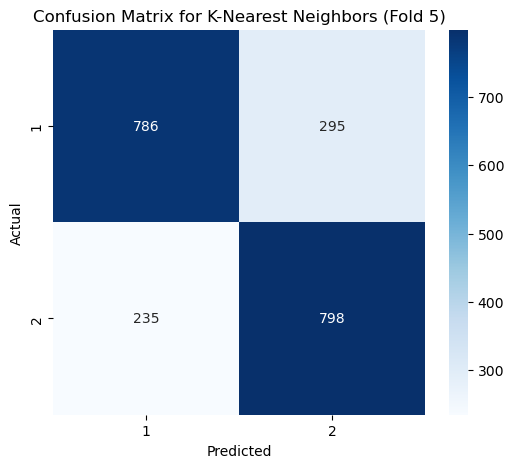

Average Accuracy for K-Nearest Neighbors: 75.84%


In [408]:
models = {
    "Logistic Regression": improved_log_model,
    "Naive Bayes": grid_model,
    "K-Nearest Neighbors": knn_classifier
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use indexing for NumPy arrays
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")


# Insights and Conclusions

Training the model was easier than expected. It was easier now since there are libraries which aid in getting the best hyperparameters for the model. The hardest part still is the preprocessing and feature extraction part. Preprocessing is tedious, especially with the number of columns present although it was nice that the categorical variables were one hot encoded beforehand and there's not much missing values. 

Some models produced better results on the initial model training but worse compared to the other models after tuning. 

# References

AI Tools were utilized for this work, namely ChatGPT.


Jain, K. (2021, Apr 2). How to Improve Naive Bayes?. Medium. Retrieved from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

Gaussian Naive Bayes. (2025, Jan 29). GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/gaussian-naive-ba

Past notebook were used as a guide. These notebooks include:

K-Nearest Neighbors.ipynb
Additionally, short descriptions for the KNN metrics were taken from:

https://www.datacamp.com/tutorial/cosine-distance
https://www.datacamp.com/tutorial/cosine-distance
http://en.wikipedia.org/wiki/Taxicab_geometry
STINTSY slides provided in Canvases/